### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import numpy as np

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "xing_nb_scan_round_150_1500"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config_final.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                      
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0               base_collider   
                                                                                         130.0               base_collider   
                                                                                         140.0               base_collider   
                                                                                         150.0               base_collider   
                                                                                         160.0               base_collider   
...                                                                                                                    ...   
                                             1.600000e+11            2.5       2.5       230.0               base_collider   
                                                                                         240.0               base_collider   
                                                                                         250.0               base_collider   
                                                                                         260.0               base_collider   
                                                                                         270.0               base_collider   

                                                                                                         normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle                                     
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0                                      2.621   
                                                                                         130.0                                      3.448   
                                                                                         140.0                                      3.724   
                                                                                         150.0                                      4.414   
                                                                                         160.0                                      4.897   
...                                                                                                                                   ...   
                                             1.600000e+11            2.5       2.5       230.0                                      4.621   
                                                                                         240.0                                      4.828   
                                                                                         250.0                                      4.966   
                                                                                         260.0                                      4.621   
                                                                                         270.0                                      4.759   

                                                                                                             qx  \
beam  i_oct_b1 i_oct_b2 dqx dqy qx     qy    num_particles_per_bunch n_emitt_x n_emitt_y crossing_angle           
lhcb1 -60.0    -60.0    5.0 5.0 62.315 60.32 8.000000e+10            2.5       2.5       120.0           62.315   
                                                                                         130.0           62.315   
                                                                                         140.0           62.315   
                                                        

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,2.621,3.448,3.724,4.414,4.897,5.172,5.379,5.862,6.483,6.276,7.103,7.310,7.655,8.000,7.310,7.793
8.500000e+10,2.759,2.966,3.655,4.276,4.483,4.966,5.379,5.448,6.207,6.483,6.483,7.241,7.310,7.310,7.448,7.103
9.000000e+10,2.552,2.828,3.310,4.069,4.345,4.897,5.241,5.724,5.655,6.345,6.897,6.483,7.172,6.897,7.034,7.517
9.500000e+10,2.483,2.759,3.379,3.862,4.345,4.690,4.759,5.103,5.379,5.931,6.414,6.759,6.828,6.690,7.448,7.448
1.000000e+11,2.414,2.690,3.172,3.655,4.207,4.414,4.897,5.379,5.034,5.379,6.069,6.414,6.552,7.310,7.103,7.310
1.050000e+11,2.069,2.690,2.897,3.379,3.724,4.552,4.690,5.103,5.310,5.655,5.724,5.931,6.207,6.759,6.966,6.690
1.100000e+11,2.069,2.690,3.103,3.448,3.862,4.138,4.552,4.690,5.103,5.034,5.379,5.793,5.931,6.828,6.759,6.621
1.150000e+11,2.000,2.552,2.759,3.310,3.724,4.138,4.621,4.897,4.621,4.828,5.103,5.103,6.207,5.931,6.483,6.828
1.200000e+11,2.000,2.345,2.690,2.828,3.379,4.138,4.690,4.897,4.690,5.172,4.966,5.379,5.793,5.517,5.724,6.552


In [4]:
df_for_levels = df.pivot(index="num_particles_per_bunch", columns="crossing_angle", values="lumi_ip_1_5")
df_for_levels

crossing_angle,120.0,130.0,140.0,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
num_particles_per_bunch,,,,,,,,,,,,,,,,
8.000000e+10,3.370454e+34,3.342656e+34,3.334981e+34,3.334913e+34,3.337793e+34,3.341712e+34,3.345839e+34,3.338622e+34,3.310899e+34,3.264063e+34,3.200361e+34,3.122605e+34,3.033872e+34,2.937246e+34,2.835604e+34,2.732114e+34
8.500000e+10,3.873322e+34,3.818190e+34,3.798225e+34,3.792412e+34,3.792583e+34,3.795288e+34,3.798967e+34,3.790043e+34,3.758019e+34,3.704398e+34,3.631697e+34,3.543088e+34,3.442064e+34,3.332122e+34,3.216530e+34,3.099196e+34
9.000000e+10,4.437362e+34,4.345477e+34,4.307600e+34,4.292841e+34,4.288399e+34,4.288693e+34,4.291129e+34,4.279752e+34,4.242572e+34,4.181185e+34,4.098376e+34,3.997706e+34,3.883106e+34,3.758521e+34,3.627636e+34,3.495291e+34
9.500000e+10,5.057119e+34,4.920854e+34,4.859463e+34,4.832425e+34,4.821385e+34,4.818036e+34,4.818430e+34,4.803884e+34,4.760767e+34,4.690734e+34,4.596842e+34,4.483051e+34,4.353753e+34,4.213366e+34,4.066019e+34,3.917605e+34
1.000000e+11,5.728638e+34,5.542477e+34,5.451911e+34,5.409005e+34,5.389205e+34,5.380887e+34,5.378398e+34,5.359954e+34,5.310144e+34,5.230647e+34,5.124775e+34,4.996897e+34,4.851885e+34,4.694649e+34,4.529779e+34,4.364315e+34
1.050000e+11,6.448672e+34,6.209820e+34,6.084399e+34,6.021678e+34,5.990692e+34,5.975915e+34,5.969608e+34,5.946489e+34,5.889223e+34,5.799456e+34,5.680745e+34,5.537866e+34,5.376183e+34,5.201115e+34,5.017731e+34,4.834277e+34
1.100000e+11,7.213686e+34,6.923027e+34,6.757294e+34,6.670421e+34,6.625489e+34,6.602549e+34,6.591355e+34,6.562701e+34,6.497171e+34,6.396317e+34,6.263913e+34,6.105139e+34,5.925857e+34,5.732008e+34,5.529157e+34,5.322196e+34
1.150000e+11,7.893934e+34,7.682320e+34,7.471499e+34,7.355792e+34,7.293779e+34,7.260713e+34,7.243400e+34,7.208241e+34,7.133573e+34,7.020781e+34,6.873814e+34,6.698249e+34,6.500448e+34,6.286885e+34,6.063631e+34,5.836027e+34
1.200000e+11,8.413592e+34,8.487522e+34,8.228160e+34,8.078720e+34,7.996110e+34,7.950662e+34,7.925805e+34,7.883039e+34,7.798277e+34,7.672639e+34,7.510212e+34,7.316945e+34,7.099701e+34,6.865491e+34,6.620906e+34,6.371743e+34


In [5]:
array_xing = np.linspace(120, 270, 16, endpoint=True)
df_to_plot.columns = [str(xing) for xing in array_xing]
df_to_plot.index /= 1e11 

df_for_levels.columns = [str(xing) for xing in array_xing]
df_for_levels.index /= 1e11

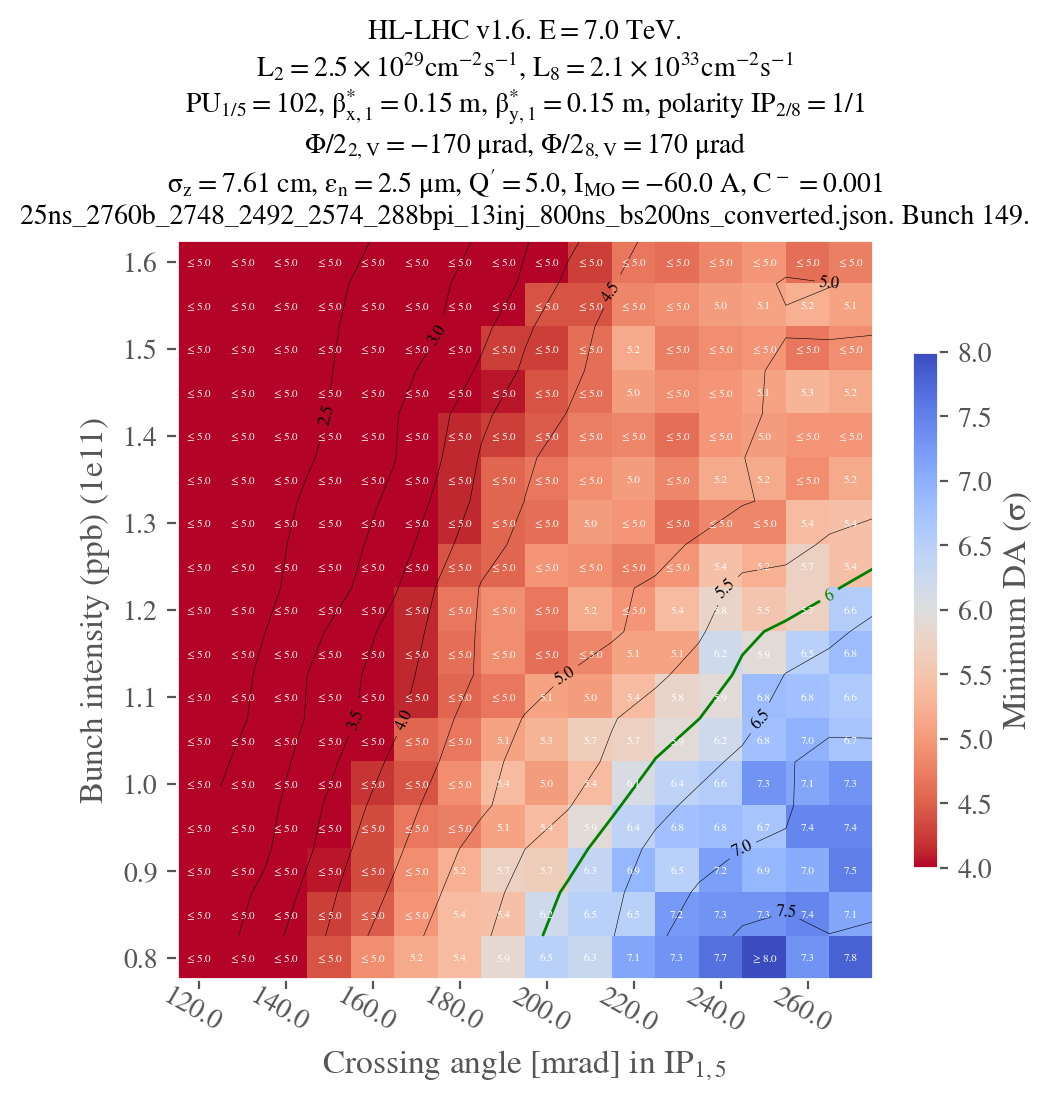

In [6]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=6.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    ignore_lumi_1_5 = True,
    vmin=4.,
    vmax=8.0,
    CC = False,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"Bunch intensity (ppb) $(1e11)$",
)
# ! Verified


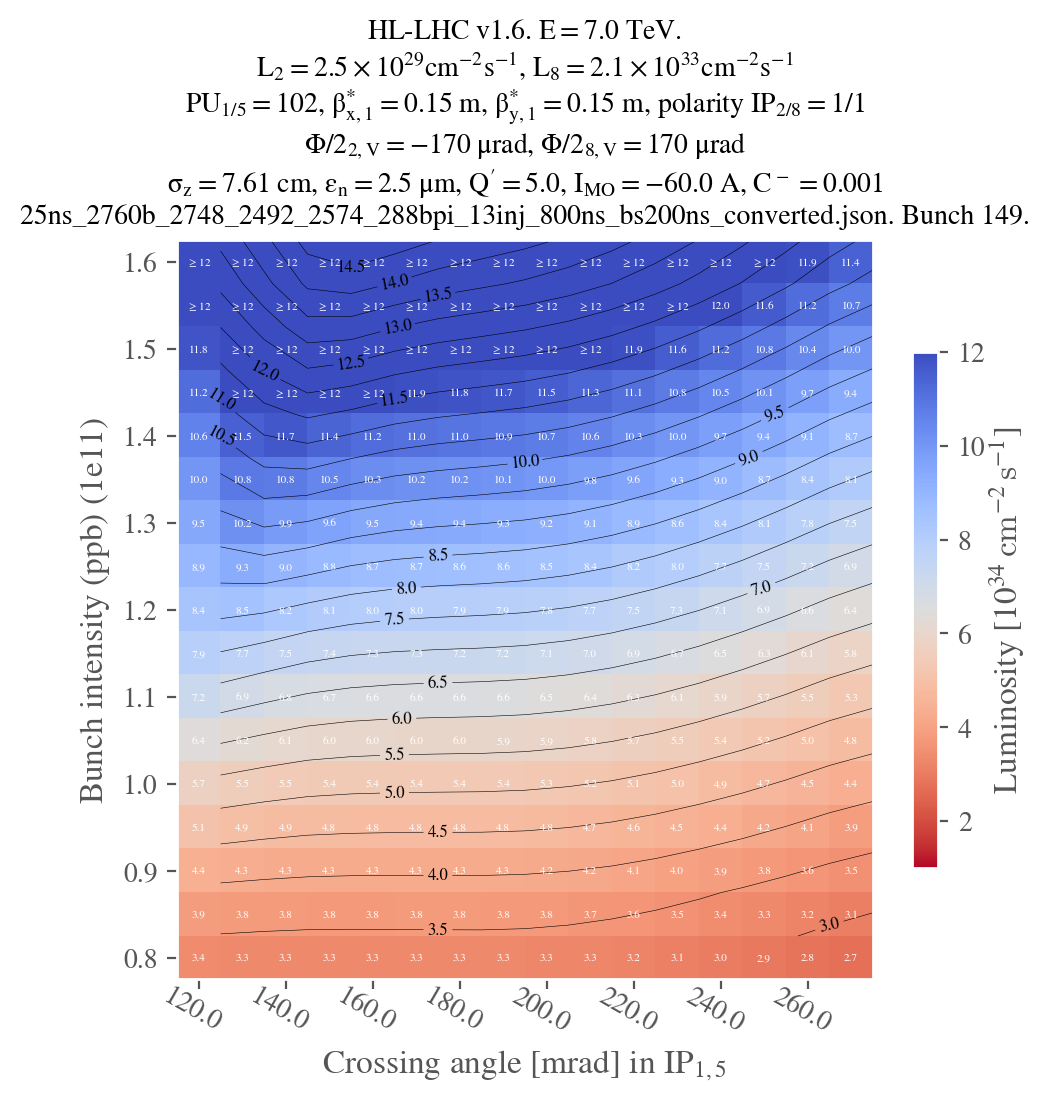

In [7]:
# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
df_for_levels /= 1e34
analysis_functions.plot_heatmap(
    df_for_levels,
    f'{STUDY_NAME}_{COLLIDER}_isolumi',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    betx=0.15,
    bety=0.15,
    Nb=False,
    symmetric=False,
    mask_lower_triangle=False,
    green_contour=15.,
    extended_diagonal=False,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=True,
    display_xing = False,
    ignore_lumi_1_5 = True,
    vmin=1,
    vmax=12,
    CC = False,
    xlabel = r"Crossing angle [mrad] in IP$_{1,5}$",
    ylabel = r"Bunch intensity (ppb) $(1e11)$",
    label_cbar = r"Luminosity [$10^{34} \, \mathrm{cm}^{-2} \, \mathrm{s}^{-1}$]"
)